In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, auc
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import learning_curve

In [3]:
data = pd.read_csv('/content/gdrive/MyDrive/RahmaniDataset/data.csv',low_memory=False)

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,129505.0,6.475200e+04,3.738502e+04,0.000000e+00,3.237600e+04,6.475200e+04,9.712800e+04,1.295040e+05
ts,129505.0,1.560000e+12,0.000000e+00,1.560000e+12,1.560000e+12,1.560000e+12,1.560000e+12,1.560000e+12
Unnamed: 2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ms,129505.0,8.233055e+04,4.810025e+04,0.000000e+00,4.090000e+04,8.190000e+04,1.229000e+05,2.172000e+05
scl,129505.0,1.879543e-03,2.875826e-01,-3.778208e+00,-1.140345e-01,-9.909735e-03,8.386372e-02,2.652299e+00
peak,129505.0,2.748929e-03,5.235832e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
hr,129505.0,1.052684e+02,2.432403e+01,2.956725e+01,8.827867e+01,1.022883e+02,1.188491e+02,1.947577e+02
lf,129505.0,1.542813e-01,1.067851e-01,0.000000e+00,9.272782e-02,1.506881e-01,2.082150e-01,8.495419e-01
hf,129505.0,2.622828e-01,1.428727e-01,0.000000e+00,1.966768e-01,2.890038e-01,3.665810e-01,6.140884e-01


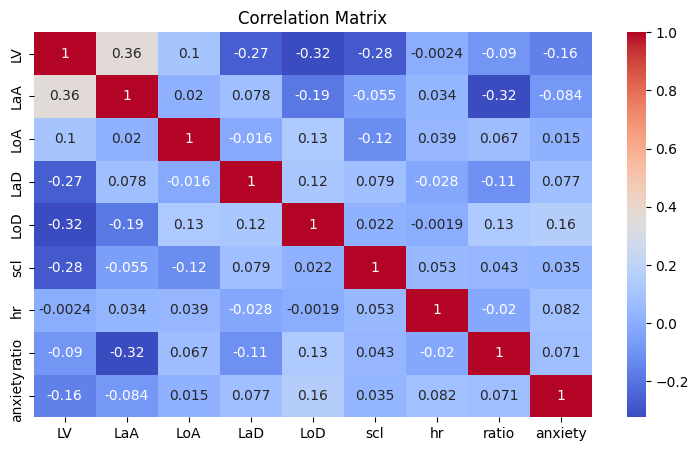

In [5]:
important_features = ['LV', 'LaA', 'LoA', 'LaD', 'LoD', 'scl', 'hr', 'ratio', 'anxiety']
plt.figure(figsize=(9, 5))
data = data[important_features].dropna(subset=['anxiety'])
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [6]:
data

,LV,LaA,LoA,LaD,LoD,scl,hr,ratio,anxiety
309,9.633541,-0.050216,-0.136053,-1.0,44.285449,-0.364974,84.969761,0.808014,1.0
310,9.582719,-0.053500,-0.159814,-1.0,43.735896,-0.356966,85.064486,0.808840,1.0
311,9.527588,-0.039620,-0.167920,-1.0,42.807185,-0.348379,85.212207,0.808737,1.0
312,9.475329,-0.034922,-0.182241,-1.0,42.280529,-0.339781,85.341886,0.807886,1.0
313,9.411625,-0.003509,-0.209336,-1.0,41.438233,-0.329959,85.398341,0.806532,1.0
...,...,...,...,...,...,...,...,...,...
129500,0.000000,-0.082508,-0.187051,-1.0,-1.000000,-0.122487,83.961286,0.000000,1.0
129501,0.000000,-0.083868,-0.185052,-1.0,-1.000000,-0.132293,83.604652,0.000000,1.0
129502,0.000000,-0.082169,-0.182230,-1.0,-1.000000,-0.139831,83.218406,0.000000,1.0
129503,0.000000,-0.080172,-0.184604,-1.0,-1.000000,-0.149286,82.802550,0.000000,1.0


In [7]:
class AnxietyPredictor:
    """
    A class for predicting anxiety levels based on various physiological features.
    """
    def __init__(self, data):
        """
        Initialize the AnxietyPredictor with the given data.

        :param data: A pandas DataFrame containing the data.
        """
        self.data = data

    def preprocess_data(self):
        """
        Preprocess the data by separating features and target, encoding the target, and splitting into training and test sets.
        """
        self.features = self.data[['LV', 'LaA', 'LoA', 'LaD', 'LoD', 'scl', 'hr', 'ratio']]
        self.target = self.data['anxiety']

        self.label_encoder = LabelEncoder()
        self.target_encoded = self.label_encoder.fit_transform(self.target)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.features, self.target_encoded, test_size=0.2, random_state=42)

        self.scaler = StandardScaler()
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)

    def train_predictor_models(self):
        """
        Train separate models to predict scl, hr, and ratio.
        """
        self.X_train_predictors = self.X_train[['LV', 'LaA', 'LoA', 'LaD', 'LoD']]
        self.X_test_predictors = self.X_test[['LV', 'LaA', 'LoA', 'LaD', 'LoD']]

        self.models = {}
        for target in ['scl', 'hr', 'ratio']:
            y_train_target = self.X_train[target]
            model = RandomForestRegressor()
            model.fit(self.X_train_predictors, y_train_target)
            self.models[target] = model

    def make_predictions(self):
        """
        Make predictions for scl, hr, and ratio using the trained models.
        """
        self.predicted_scl = self.models['scl'].predict(self.X_test_predictors)
        self.predicted_hr = self.models['hr'].predict(self.X_test_predictors)
        self.predicted_ratio = self.models['ratio'].predict(self.X_test_predictors)

        self.X_test_with_predictions = self.X_test_predictors.copy()
        self.X_test_with_predictions['scl'] = self.predicted_scl
        self.X_test_with_predictions['hr'] = self.predicted_hr
        self.X_test_with_predictions['ratio'] = self.predicted_ratio

    def train_classifier(self):
        """
        Train a classifier to predict anxiety levels using all features.
        """
        self.classifier = RandomForestClassifier()
        self.classifier.fit(self.X_train_scaled, self.y_train)

    def evaluate_classifier(self):
        """
        Evaluate the performance of the classifier.
        """
        self.y_pred = self.classifier.predict(self.X_test_scaled)
        self.accuracy = accuracy_score(self.y_test, self.y_pred)
        print(f'Accuracy: {self.accuracy:.2f}')

data = data
predictor = AnxietyPredictor(data)
predictor.preprocess_data()
predictor.train_predictor_models()
predictor.make_predictions()
predictor.train_classifier()
predictor.evaluate_classifier()

Accuracy: 0.98


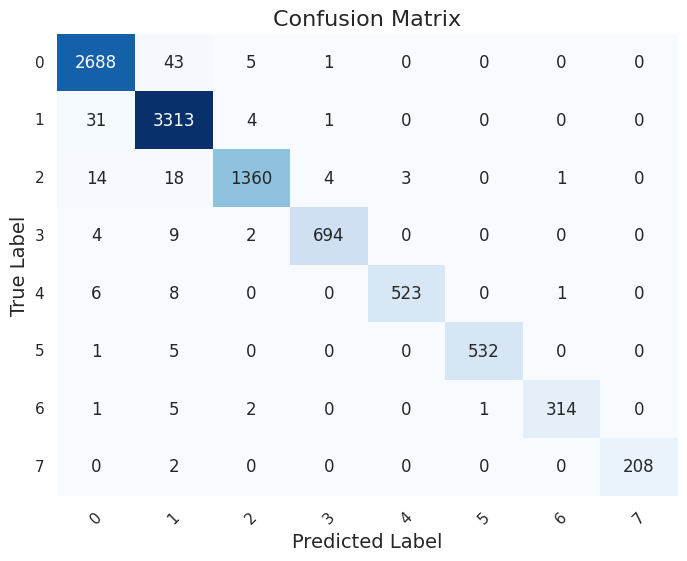

--------------------------------------------------------------------------------


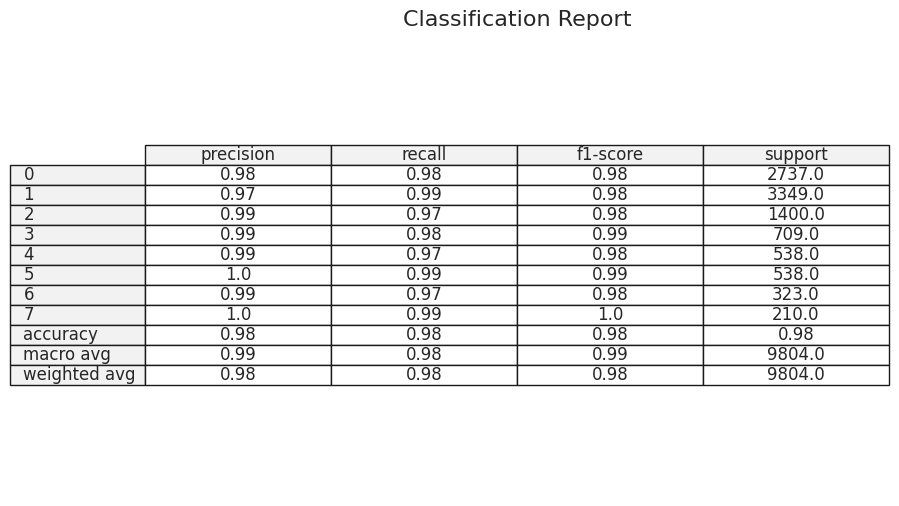

--------------------------------------------------------------------------------


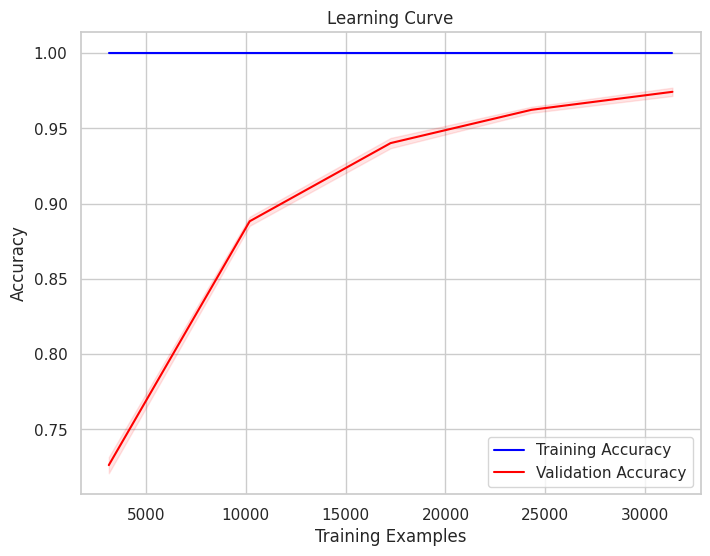

--------------------------------------------------------------------------------


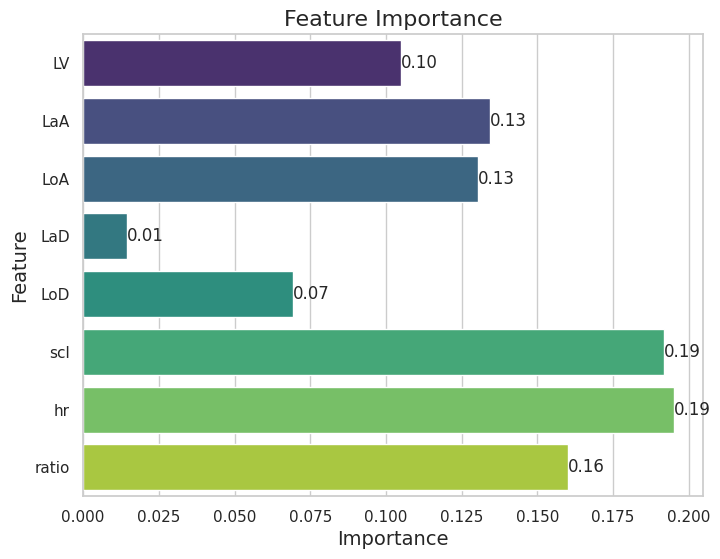

--------------------------------------------------------------------------------


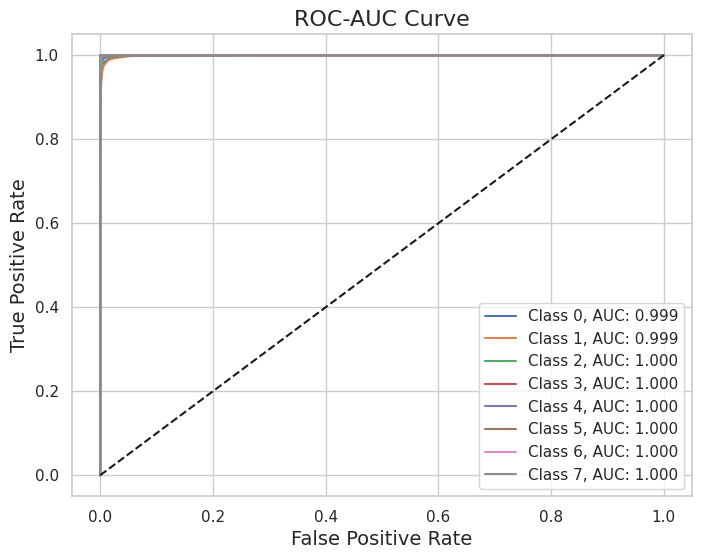

--------------------------------------------------------------------------------


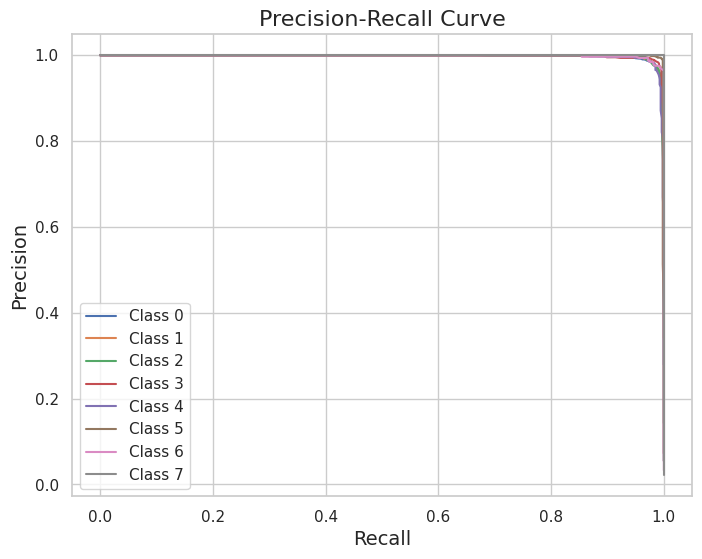

--------------------------------------------------------------------------------


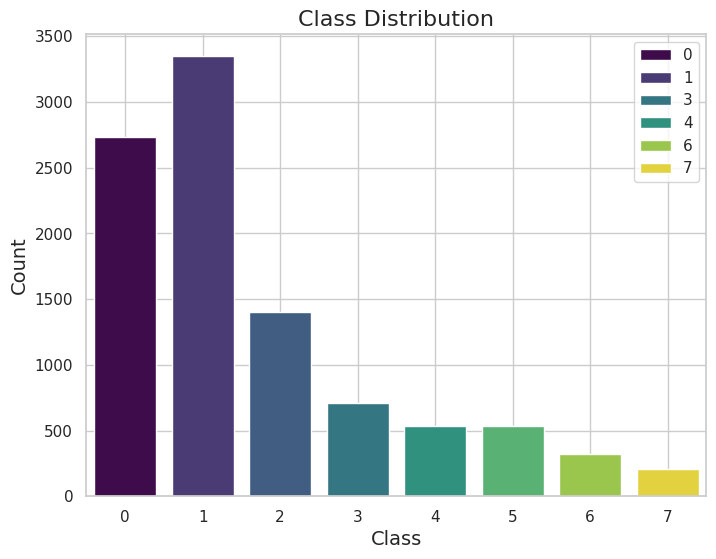

In [9]:
sns.set(style="whitegrid")
plt.rcParams.update({'font.size': 12})

def plot_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=range(cm.shape[1]), yticklabels=range(cm.shape[0]))
    plt.xlabel('Predicted Label', fontsize=14)
    plt.ylabel('True Label', fontsize=14)
    plt.title('Confusion Matrix', fontsize=16)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.show()

def plot_classification_report(y_test, y_pred):
    cr = classification_report(y_test, y_pred, output_dict=True)
    cr_df = pd.DataFrame(cr).transpose()
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('tight')
    ax.axis('off')
    table = ax.table(cellText=cr_df.values.round(2),
                     colLabels=cr_df.columns,
                     rowLabels=cr_df.index,
                     cellLoc='center',
                     loc='center',
                     colColours=['#f2f2f2']*len(cr_df.columns),
                     rowColours=['#f2f2f2']*len(cr_df))
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2)
    plt.title('Classification Report', fontsize=16)
    plt.show()

def plot_learning_curve(classifier, X_train_scaled, y_train):
    train_sizes, train_scores, val_scores = learning_curve(classifier, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)
    val_std = np.std(val_scores, axis=1)
    plt.figure(figsize=(8, 6))
    plt.plot(train_sizes, train_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
    plt.plot(train_sizes, val_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color='red')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.title('Learning Curve')
    plt.legend(loc='best')
    plt.show()

def plot_feature_importance(classifier, X_train):
    importances = classifier.feature_importances_
    feature_names = X_train.columns
    plt.figure(figsize=(8, 6))
    sns.barplot(x=importances, y=feature_names, palette="viridis", hue=feature_names, dodge=False, legend=False)
    plt.xlabel("Importance", fontsize=14)
    plt.ylabel("Feature", fontsize=14)
    plt.title("Feature Importance", fontsize=16)
    for index, value in enumerate(importances):
        plt.text(value, index, f"{value:.2f}", ha='left', va='center')
    plt.show()

def plot_roc_auc_curve(y_test, y_pred_proba):
    aucs = []
    plt.figure(figsize=(8, 6))
    for i in range(y_pred_proba.shape[1]):
        fpr, tpr, _ = roc_curve(y_test == i, y_pred_proba[:, i])
        auc_score = roc_auc_score(y_test == i, y_pred_proba[:, i])
        aucs.append(auc_score)
        plt.plot(fpr, tpr, label=f"Class {i}, AUC: {auc_score:.3f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate", fontsize=14)
    plt.ylabel("True Positive Rate", fontsize=14)
    plt.title("ROC-AUC Curve", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_precision_recall_curve(y_test, y_pred_proba):
    le = LabelEncoder()
    y_test_encoded = le.fit_transform(y_test)
    plt.figure(figsize=(8, 6))
    for i in range(y_pred_proba.shape[1]):
        precision, recall, _ = precision_recall_curve(y_test_encoded == i, y_pred_proba[:, i])
        plt.plot(recall, precision, label=f"Class {i}")
    plt.xlabel("Recall", fontsize=14)
    plt.ylabel("Precision", fontsize=14)
    plt.title("Precision-Recall Curve", fontsize=16)
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_class_distribution(y_test):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y_test, hue=y_test, palette="viridis", dodge=False)
    plt.xlabel("Class", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.title("Class Distribution", fontsize=16)
    plt.grid(True)
    plt.show()


plot_confusion_matrix(predictor.y_test, predictor.y_pred)
print("-" * 80)
plot_classification_report(predictor.y_test, predictor.y_pred)
print("-" * 80)
plot_learning_curve(predictor.classifier, predictor.X_train_scaled, predictor.y_train)
print("-" * 80)
plot_feature_importance(predictor.classifier, predictor.X_train)
print("-" * 80)
plot_roc_auc_curve(predictor.y_test, predictor.classifier.predict_proba(predictor.X_test_scaled))
print("-" * 80)
plot_precision_recall_curve(predictor.y_test, predictor.classifier.predict_proba(predictor.X_test_scaled))
print("-" * 80)
plot_class_distribution(predictor.y_test)

In [14]:
def predict_anxiety(predictor, lv, laa, loa, lad, lod):
    """
    Predict anxiety level based on the given features.

    :param predictor: An instance of AnxietyPredictor class.
    :param lv: The LV feature value.
    :param laa: The LaA feature value.
    :param loa: The LoA feature value.
    :param lad: The LaD feature value.
    :param lod: The LoD feature value.
    :return: The predicted anxiety level.
    """
    # Create a DataFrame for the input features with appropriate column names
    input_features = pd.DataFrame([[lv, laa, loa, lad, lod]], columns=['LV', 'LaA', 'LoA', 'LaD', 'LoD'])

    # Predict scl, hr, and ratio
    scl = predictor.models['scl'].predict(input_features)[0]
    hr = predictor.models['hr'].predict(input_features)[0]
    ratio = predictor.models['ratio'].predict(input_features)[0]

    # Combine all features
    features = pd.DataFrame([[lv, laa, loa, lad, lod, scl, hr, ratio]], columns=['LV', 'LaA', 'LoA', 'LaD', 'LoD', 'scl', 'hr', 'ratio'])
    features_scaled = predictor.scaler.transform(features)

    # Predict anxiety
    predicted_anxiety = predictor.classifier.predict(features_scaled)
    return predictor.label_encoder.inverse_transform(predicted_anxiety)[0]

# Predict anxiety level based on the given features
lv, laa, loa, lad, lod = 9,	-0.05,	-0.1,	-1.0,	43
anxiety = predict_anxiety(predictor, lv, laa, loa, lad, lod)
print(f'Predicted Anxiety: {anxiety}')


Predicted Anxiety: 1.0
